In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

%matplotlib inline

In [12]:
tech_sup_df = pd.read_csv('technical_support_data-1.csv')
tech_sup_df.head()


,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [13]:
tech_sup_df.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

In [14]:
tech_num_df = tech_sup_df.loc[:,tech_sup_df.columns != 'PROBLEM_TYPE']
tech_num_df.head()


,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,170,1.3,32,0.04,0.0,75,25
1,12,2.0,150,0.01,0.5,5,95
2,5,1.0,35,0.02,0.2,90,10
3,3,2.0,8,0.01,0.7,5,95
4,45,2.3,54,0.15,0.0,99,1


In [19]:
techz_df = tech_num_df.apply(zscore)
techz_df.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074


In [28]:
teacz_full=techz_df.join(tech_sup_df['PROBLEM_TYPE'])
teacz_full.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,PROBLEM_TYPE
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,Temperature control not working
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,power chord does not tightly fit
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,Fan swing not working
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,Main switch does not on
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,Forgot mobile app password


In [32]:
test_tecz = pd.concat((techz_df,tech_sup_df['PROBLEM_TYPE']),axis=1)
test_tecz.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,PROBLEM_TYPE
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,Temperature control not working
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,power chord does not tightly fit
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,Fan swing not working
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,Main switch does not on
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,Forgot mobile app password


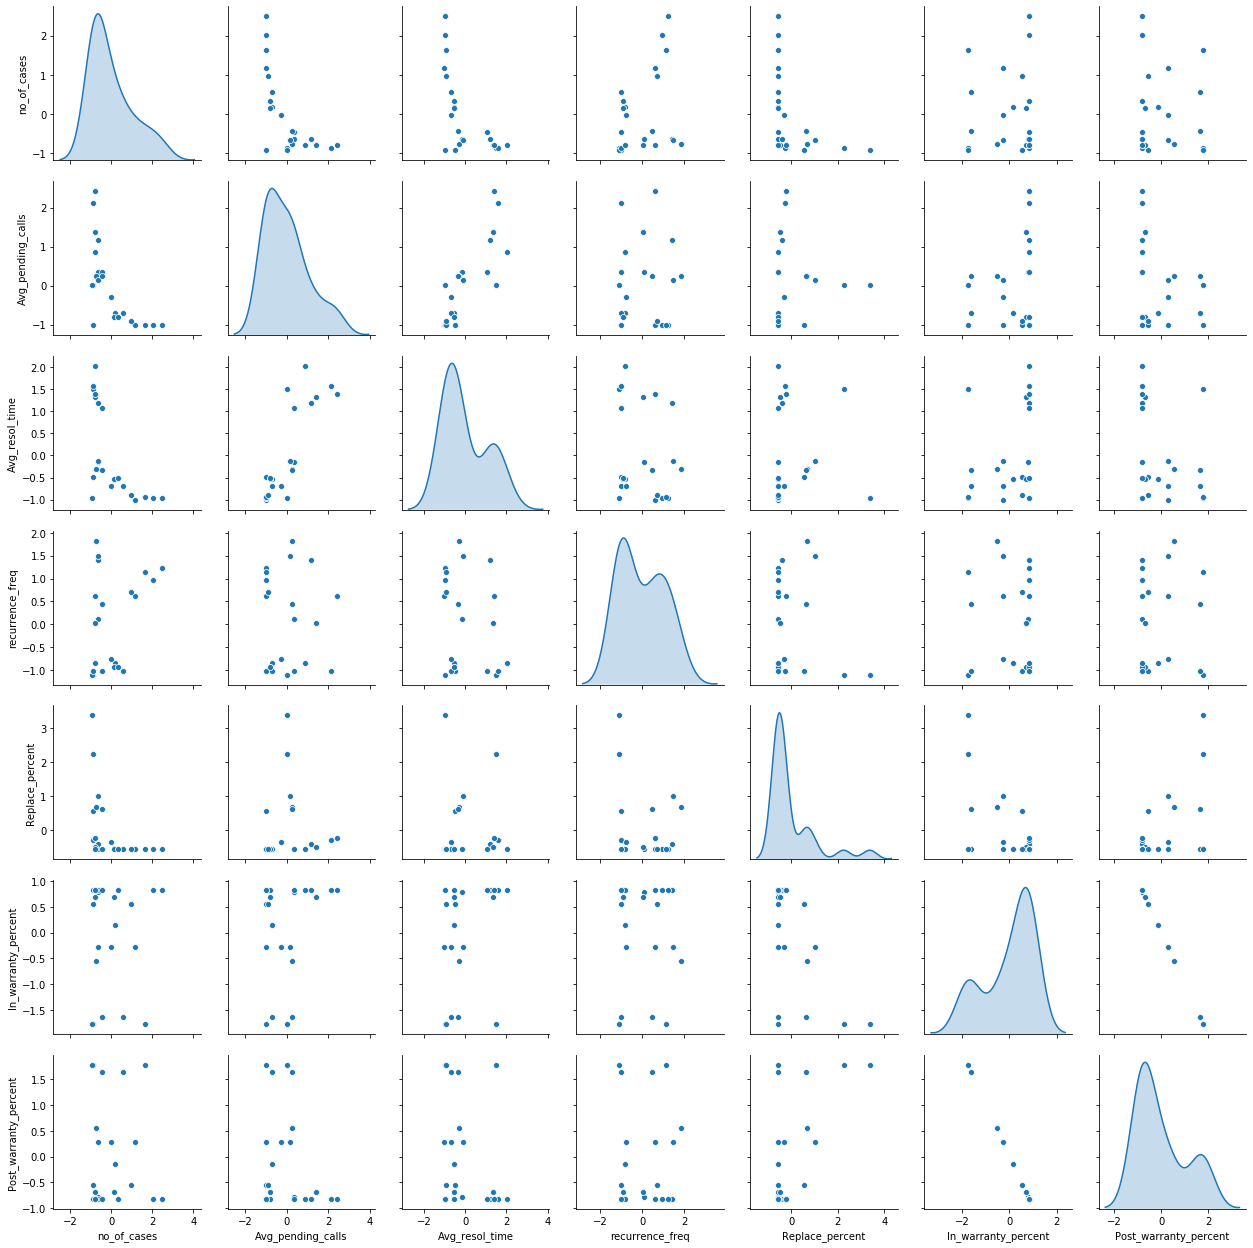

In [33]:
sns.pairplot(techz_df,diag_kind='kde')

In [36]:
model = KMeans(n_clusters=3)
model.fit(techz_df)
pred = model.predict(techz_df)

In [37]:
model.cluster_centers_

array([[ 0.70975361, -0.83994011, -0.735168  , -0.10576279, -0.41173988,
         0.42702805, -0.42702805],
       [-0.20199056, -0.151228  , -0.26297348,  0.24037539,  0.97052971,
        -1.34802042,  1.34802042],
       [-0.7105498 ,  1.23115099,  1.20818948, -0.10439466, -0.44114987,
         0.79898435, -0.79898435]])

In [38]:
model.score

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [39]:
model.inertia_

72.23755934211154

In [42]:
from scipy.spatial.distance import cdist
sum(np.min(cdist(techz_df, model.cluster_centers_, 'euclidean'), axis=1))

37.64701249082459

In [43]:
meanerror = []
inertia = []
n_tries = range(1,10)

for i in n_tries:
    model = KMeans(n_clusters=i)
    model.fit(techz_df)
    inertia.append(model.inertia_)
    meanerror.append(sum(np.min(cdist(techz_df, model.cluster_centers_, 'euclidean'), axis=1)))



Text(0.5, 1.0, 'Selecting k with the Elbow Method')

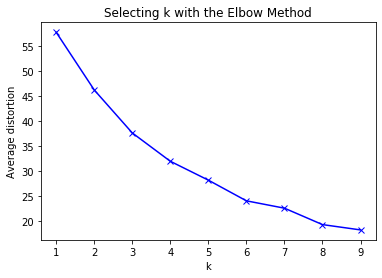

In [45]:
plt.plot(n_tries, meanerror, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

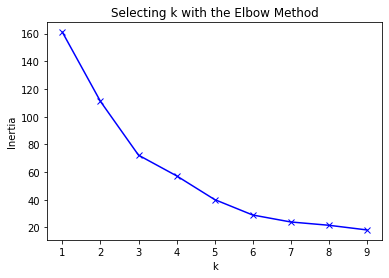

In [46]:
plt.plot(n_tries, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Selecting k with the Elbow Method')

In [50]:
model = KMeans(n_clusters=2)
model.fit(techz_df)
pred = model.predict(techz_df)
teacz_full['Label'] =pred

In [52]:
teacz_full[['PROBLEM_TYPE','Label']]

,PROBLEM_TYPE,Label
0,Temperature control not working,1
1,power chord does not tightly fit,1
2,Fan swing not working,1
3,Main switch does not on,1
4,Forgot mobile app password,0
5,AC stops abruptly,0
6,App hangs while entring commands,0
7,App takes a long time to initialize,1
8,Unable to connect the App to the device,1
9,Reinstalling the app hangs the phone,0


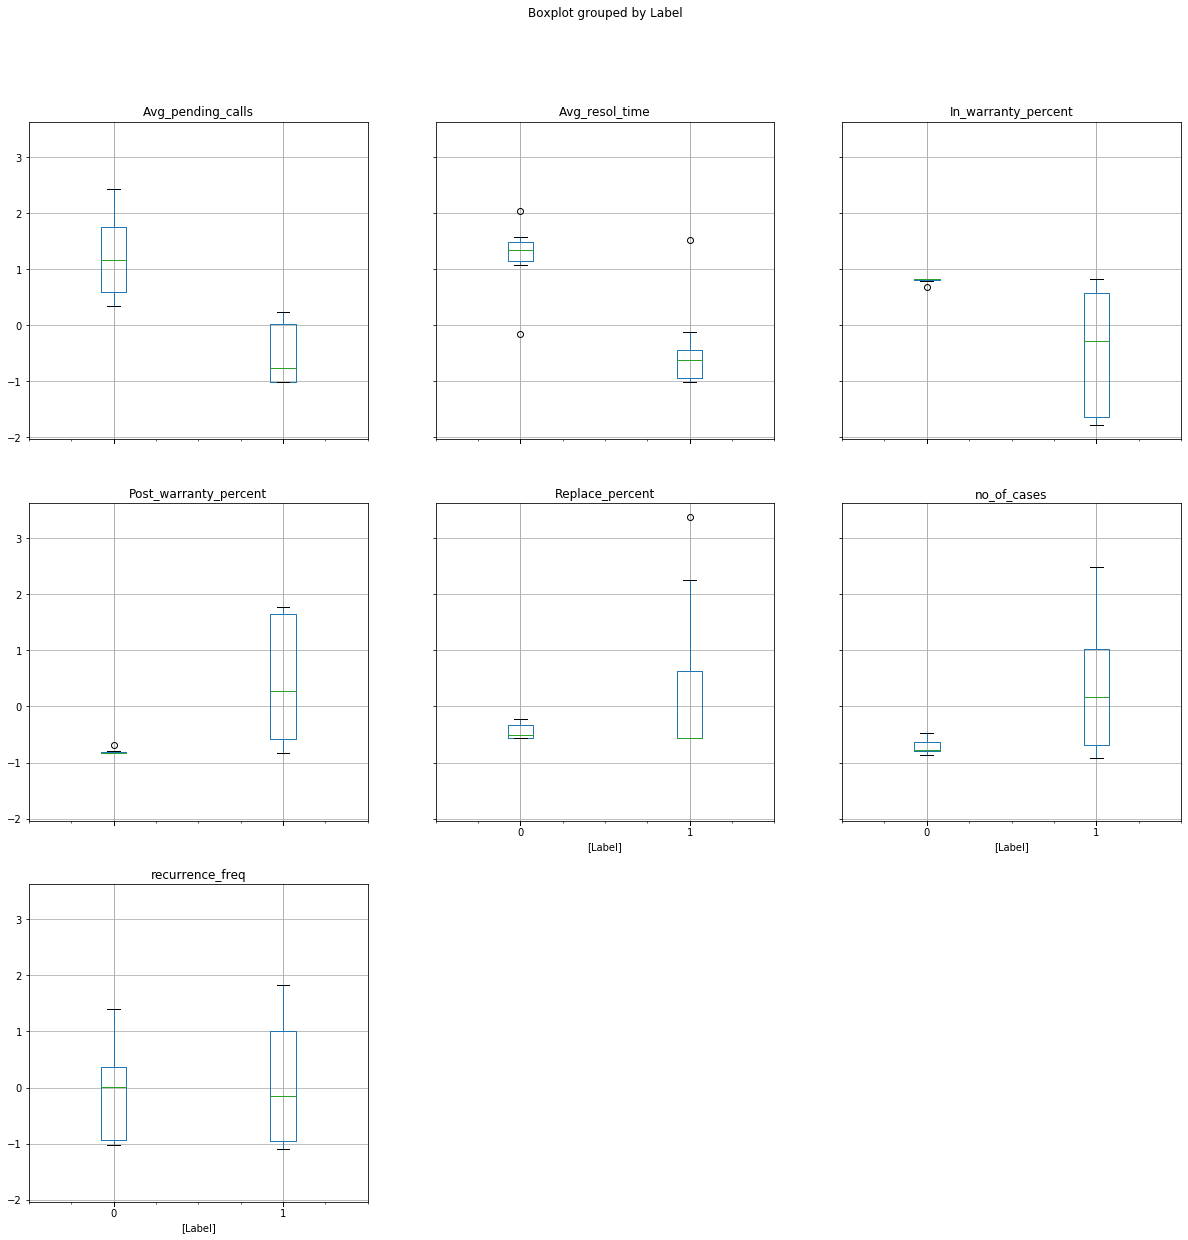

In [57]:
teacz_full.boxplot(by='Label',figsize=(20,20));